### **Movie review classification**

Import the required libraries.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy as sp
from google.colab import files, drive
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import models
from keras.layers import Dense

Mount the drive to access files

In [11]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the training data

In [12]:
data = pd.read_csv('/content/drive/MyDrive/Train.csv')

data.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [13]:
data.shape

(40000, 2)

In [14]:
data.columns

Index(['review', 'label'], dtype='object')

In [15]:
data['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

## Encoding the label

Use Label Encoder to encode the labels of the dataset.

In [16]:
encoder = LabelEncoder()

In [17]:
y = data['label'].values

In [18]:
y = encoder.fit_transform(y)

After encoding, labels are represented as follows:

neg : 0

pos :1

In [19]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

### Data preprocessing

In [20]:
data['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

English stopwords are stored in sw and stemmer function is also called.

In [22]:
sw = set (stopwords.words('english'))
ps = PorterStemmer()

In [23]:
def preprocessor(text):
    text = text.lower() # converting characters to lower case
    text = text.replace("<br /><br />", "") # replacing line breaks
    text = re.sub("[^a-zA-Z]+", " ", text) # regular expression to avoid strings that are not characters
    text = text.split() # splitting words by space
    text = [ps.stem(s) for s in text if s not in sw] # list comprehension for non stopwords
    text = " ".join(text)
    
    return text

Example of a cleaned review

In [72]:
preprocessor(data['review'][36])

'movi open upon julian sand lie back black kitten drool blood await mouth hold two feet provoc thought go good vampir movi die liter scene captur part imagin slow unev drivel thereaft vastli disappoint previou experi sand act quit enjoy howev attempt obvious misdirect screenplay left lot desir even julian sand question perform could begin save alreadi sunken barg movi rate fiend'

Example of the same original review.

In [73]:
data['review'][36] 

'The movie opens upon Julian Sands, lying on his back, a black kitten drooling blood into his awaiting mouth from where he holds it, about two feet above him. That was so provocative, and I thought, "Here we go! A good vampire movie!" <br /><br />And then it died. That was literally the only scene which captured any part of the imagination. It was slow, uneventful drivel thereafter. I was vastly disappointed, as my previous experience with Sands\' acting was quite enjoyable. However, this attempt was obviously misdirected and the screenplay left a lot to be desired.<br /><br />Even Julian Sands\'s questionable performance could not begin to save this already sunken barge of a movie.<br /><br />It rates a 1.1/10 from...<br /><br />the Fiend :.'

Storing cleaned review as a separate column in the dataframe.

In [26]:
data['cleaned_review'] =  data['review'].apply(lambda x: preprocessor(x))

In [27]:
data

,review,label,cleaned_review
0,mature intelligent and highly charged melodram...,pos,matur intellig highli charg melodrama unbelive...
1,http://video.google.com/videoplay?docid=211772...,pos,http video googl com videoplay docid hl en dis...
2,Title: Opera (1987) Director: Dario Argento Ca...,pos,titl opera director dario argento cast cristin...
3,I think a lot of people just wrote this off as...,pos,think lot peopl wrote anoth one tom cruis weir...
4,This is a story of two dogs and a cat looking ...,pos,stori two dog cat look way back home old wise ...
...,...,...,...
39995,There are similarities between Ray Lawrence's ...,neg,similar ray lawrenc jindabyn last movi lantana...
39996,"For starters, I once met the director when he ...",neg,starter met director go ww enact period movi c...
39997,"Much of ""Over Her Dead Body"" is so painfully u...",neg,much dead bodi pain unfunni actual squirm seat...
39998,"""Lifeforce"" is a truly bizarre adaptation of t...",pos,lifeforc truli bizarr adapt novel space vampir...


In [28]:
corpus = data['cleaned_review'].values

Using tfidf vectorizer to vectorize the data.

In [29]:
tfidf = TfidfVectorizer(max_features = 50000)

In [30]:
X = tfidf.fit_transform(corpus)

In [31]:
print(X[0])

  (0, 41060)	0.08906256168584327
  (0, 24498)	0.1851123495162575
  (0, 35377)	0.06759052981892846
  (0, 36914)	0.1276930371727309
  (0, 43631)	0.23185765777819362
  (0, 24063)	0.08347788004023948
  (0, 29479)	0.0972010268599736
  (0, 39858)	0.3460445567307194
  (0, 47635)	0.6287307016388057
  (0, 5865)	0.21152411965954926
  (0, 14572)	0.10388952154603277
  (0, 44630)	0.37262466753595486
  (0, 25584)	0.2018462552399835
  (0, 5614)	0.18655758543478923
  (0, 19378)	0.14228939888610864
  (0, 20842)	0.15261620176197327
  (0, 25162)	0.19553858051374168


In [32]:
X.shape

(40000, 50000)

In [33]:
y.shape

(40000,)

### Neural Network

Sequential model is used with 3 dense layers.

In [34]:
model = models.Sequential()
model.add( Dense(16, activation="relu", input_shape = (X.shape[1],) ) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="sigmoid"))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                800016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])

Splitting the training date into training and validation data using 80-20 split.

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
X_train.shape, y_train.shape

((32000, 50000), (32000,))

In [39]:
X_val.shape, y_val.shape

((8000, 50000), (8000,))

In [40]:
X_train.sort_indices()
X_val.sort_indices()

In [41]:
hist = model.fit(X_train, y_train, epochs = 3, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


250/250 [==============================] - 4s 12ms/step - loss: 0.4461 - accuracy: 0.8594 - val_loss: 0.2785 - val_accuracy: 0.8906
Epoch 2/3
250/250 [==============================] - 3s 10ms/step - loss: 0.2130 - accuracy: 0.9178 - val_loss: 0.2488 - val_accuracy: 0.8994
Epoch 3/3
250/250 [==============================] - 3s 11ms/step - loss: 0.1660 - accuracy: 0.9376 - val_loss: 0.2575 - val_accuracy: 0.8953


In [42]:
result = hist.history

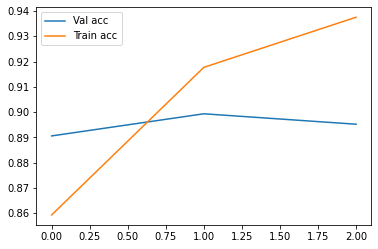

In [43]:
plt.plot(result['val_accuracy'], label = "Val acc")
plt.plot(result['accuracy'], label = "Train acc")
plt.legend()
plt.show()

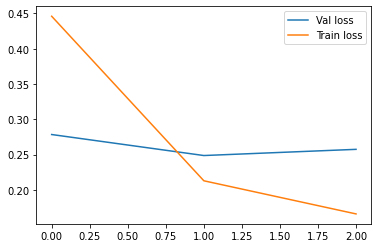

In [44]:
plt.plot(result['val_loss'], label = "Val loss")
plt.plot(result['loss'], label = "Train loss")
plt.legend()
plt.show()

In [45]:
model.evaluate(X_val, y_val)

250/250 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.8953


[0.2575269639492035, 0.8952500224113464]

### Testing

Loading the test data.

In [46]:
test_data = pd.read_csv('/content/drive/MyDrive/Test.csv')

In [47]:
test_data.shape

(10000, 1)

Preprocessing the reviews.

In [48]:
test_data['cleaned_review'] = test_data['review'].apply(preprocessor)

In [49]:
test_data

,review,cleaned_review
0,Remember those old kung fu movies we used to w...,rememb old kung fu movi use watch friday satur...
1,This movie is another one on my List of Movies...,movi anoth one list movi bother saw year ago a...
2,How in the world does a thing like this get in...,world thing like get dvd player home even get ...
3,"""Queen of the Damned"" is one of the best vampi...",queen damn one best vampir movi ever seen movi...
4,The Caprica episode (S01E01) is well done as a...,caprica episod e well done pilot realli episod...
...,...,...
9995,Watched this piece ONDEMAND because the descri...,watch piec ondemand descript kind outlandish f...
9996,A nurse travels to a rural psychiatric clinic ...,nurs travel rural psychiatr clinic run doctor ...
9997,Although this small film kind of got lost in t...,although small film kind got lost wake waterfr...
9998,I first saw this film in the early 80's on cab...,first saw film earli cabl uniqu statement sixt...


In [50]:
X_test = test_data['cleaned_review']

In [51]:
X_test = tfidf.transform(X_test)

In [52]:
X_test.shape

(10000, 50000)

In [53]:
X_test.sort_indices()

In [54]:
y_pred = model.predict(X_test)

Rounding off labels to 0 and 1.

In [55]:
y_pred[ y_pred >= 0.5 ]  =  1

In [56]:
y_pred = y_pred.astype('int')

In [57]:
y_pred[:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

Using a dictionary to decode the labels.

In [58]:
dic = {0 : 'neg' , 1 : 'pos'}
y_pred = [ dic[p[0]] for p in y_pred ]

In [59]:
y_pred[:10]

['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos']

Adding the reviews and predicted label to a dataframe.

In [60]:
df = pd.DataFrame({'Review': test_data['review'], 'Label': y_pred}, 
                  columns=['Review', 'Label'])

In [61]:
df.head()

,Review,Label
0,Remember those old kung fu movies we used to w...,neg
1,This movie is another one on my List of Movies...,neg
2,How in the world does a thing like this get in...,neg
3,"""Queen of the Damned"" is one of the best vampi...",pos
4,The Caprica episode (S01E01) is well done as a...,pos


Saving the prediction in a csv file.

In [62]:
df.to_csv("Prediction.csv", index = False)